<a href="https://colab.research.google.com/github/Aditya-titus/Machine-learning/blob/main/Neural%20Network%20Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial 6 - Neural Networks


### 1-D Function Fitting

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import *

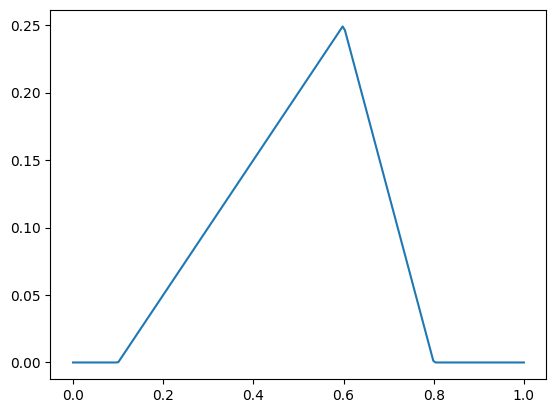

In [10]:
x = np.linspace(0,1,200)
y = x.copy()


y[x < 0.1] = 0
y[x >= 0.1] = 0.5*(x[x >= 0.1] - 0.1)    # gradient of 0.5
y[x >= 0.6] = 0.25 - 0.25/0.2*(x[x >= 0.6]-0.6) # gradient reduced from x = 0.6 to 0.8
y[x > 0.8] = 0

fig, ax = plt.subplots()
plt.plot(x,y)

In [ ]:
# Use Keras to fit the function
model = Sequential()

# Add a layer of 3 nodes of ReLUs taking a single input parameter
model.add(Dense(units = 150, activation = 'relu', input_dim = 1))

# Add a linear node at the end to combine the nodes together
model.add(Dense(units = 1, activation = 'linear'))

# Compile the model, trying to minimise MSE
model.compile(loss = "mean_squared_error",optimizer = "adam")

# Fit data using 200 epochs and a batch size of 32
model.fit(x,y,epochs = 200, batch_size = 32)

# Obtain a predicted set of values from fitted function along its length
y_pred = model.predict(x)

plt.plot(x,y_pred)




#single layered model
#model.add(Dense(units=3, activation='relu', input_dim=1))
model.add(Dense(units=150, activation='relu', input_dim=1))
#model.add(Dense(units=150, activation='sigmoid', input_dim=1))
#model.add(Dense(units=150, activation='tanh', input_dim=1))
#model.add(Dense(units=150, activation='softplus', input_dim=1))

#try a multi-layered model
#activation_function = 'relu'
#activation_function = 'tanh'
#model.add(Dense(units=10, activation=activation_function, input_dim=1))
#model.add(Dense(units=10, activation=activation_function))
#model.add(Dense(units=10, activation=activation_function))

In [ ]:
# Manually adding weights (should not have to do this irl)

model.layers[0].set_weights(np.array([[0.5,-(-0.5-0.25/0.2),0.25/0.2]],), np.array([-0.5*0.1,(-0.5-0.25/0.2)*0.6,-(0.25/0.2)*0.8],))

model.layers[1].set_weights([np.array([[1],[-1],[1]],),np.array([0],)])

y_predict = model.predict(x)

plt.plot(x,y_pred)

## 2-D Function fitting

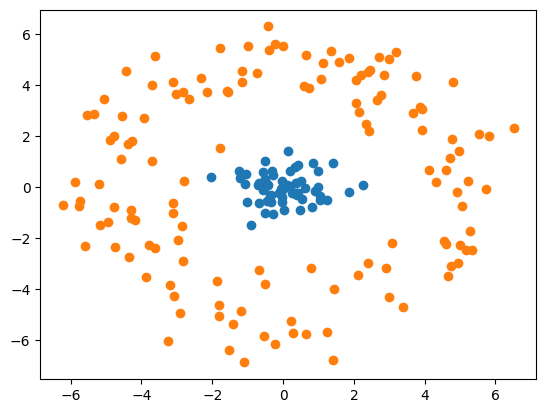

In [4]:
# Circular distribution function

def gen_simple_circular_distribution(n=100, scale=1):
    a = np.round(n/3).astype('int')
    b = n-a
    r1 = np.random.normal(loc=0, scale=scale, size=[a, 1])
    r2 = np.random.normal(loc=5, scale=scale, size=[b, 1])

    th1 = np.random.uniform(low=0, high=2 * np.pi, size=[a, 1])
    th2 = np.random.uniform(low=0, high=2 * np.pi, size=[b, 1])

    x1a = r1 * np.cos(th1)
    x2a = r1 * np.sin(th1)

    x1b = r2 * np.cos(th2)
    x2b = r2 * np.sin(th2)

    X = np.concatenate([np.concatenate([x1a.reshape([a, 1]), x1b.reshape([b, 1])]),
                        np.concatenate([x2a.reshape([a, 1]), x2b.reshape([b, 1])])], axis=1)

    y = np.concatenate([np.zeros([a, 1]), np.ones([b, 1])]).squeeze()
    return X, y


X, y = gen_simple_circular_distribution(200)

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(X[y == 0, 0], X[y == 0, 1])
ax.scatter(X[y == 1, 0], X[y == 1, 1])

Epoch 1/250
7/7 [==============================] - 1s 5ms/step - loss: 0.5717
Epoch 2/250
7/7 [==============================] - 0s 4ms/step - loss: 0.5699
Epoch 3/250
7/7 [==============================] - 0s 2ms/step - loss: 0.5685
Epoch 4/250
7/7 [==============================] - 0s 2ms/step - loss: 0.5668
Epoch 5/250
7/7 [==============================] - 0s 2ms/step - loss: 0.5649
Epoch 6/250
7/7 [==============================] - 0s 2ms/step - loss: 0.5628
Epoch 7/250
7/7 [==============================] - 0s 3ms/step - loss: 0.5610
Epoch 8/250
7/7 [==============================] - 0s 2ms/step - loss: 0.5593
Epoch 9/250
7/7 [==============================] - 0s 3ms/step - loss: 0.5570
Epoch 10/250
7/7 [==============================] - 0s 2ms/step - loss: 0.5546
Epoch 11/250
7/7 [==============================] - 0s 2ms/step - loss: 0.5512
Epoch 12/250
7/7 [==============================] - 0s 2ms/step - loss: 0.5485
Epoch 13/250
7/7 [==============================] - 0s 2ms/st

(-10.0, 10.0)

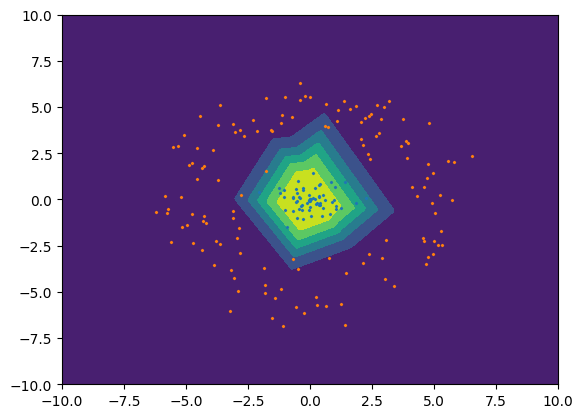

In [5]:
# Use Keras to fit the function
model = Sequential()

# Add a 4 layer 2 input model
model.add(Dense(units = 4, activation = 'relu', input_dim = 2))
model.add(Dense(units = 2, activation = 'relu'))
model.add(Dense(units = 2, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'sgd')

# Transform training data to proper vectors
y_binary = to_categorical(y)

model.fit(X,y_binary,epochs = 250,batch_size = 32)

def gen_sample_grid(npx=200, npy=200, limit=1):
  x1line = np.linspace(-limit, limit, npx)
  x2line = np.linspace(-limit, limit, npy)
  x1grid, x2grid = np.meshgrid(x1line, x2line)
  Xgrid = np.array([x1grid, x2grid]).reshape([2,npx*npy]).T
  return Xgrid,x1line,x2line

lim = 10
Xgrid,x1line,x2line = gen_sample_grid(limit=lim)

out_values = model.predict(Xgrid)

out_grid = np.reshape(out_values[:, 0], [200, 200])

fig, ax = plt.subplots()
plt.contourf(x1line,x2line,out_grid)

ax.scatter(X[y == 0, 0], X[y == 0, 1], marker='x', s=2)
ax.scatter(X[y == 1, 0], X[y == 1, 1], marker='x', s=2)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)


Epoch 1/1000
2/2 [==============================] - 0s 6ms/step - loss: 0.6871
Epoch 2/1000
2/2 [==============================] - 0s 5ms/step - loss: 0.6848
Epoch 3/1000
2/2 [==============================] - 0s 4ms/step - loss: 0.6822
Epoch 4/1000
2/2 [==============================] - 0s 4ms/step - loss: 0.6800
Epoch 5/1000
2/2 [==============================] - 0s 4ms/step - loss: 0.6777
Epoch 6/1000
2/2 [==============================] - 0s 4ms/step - loss: 0.6758
Epoch 7/1000
2/2 [==============================] - 0s 4ms/step - loss: 0.6736
Epoch 8/1000
2/2 [==============================] - 0s 4ms/step - loss: 0.6720
Epoch 9/1000
2/2 [==============================] - 0s 5ms/step - loss: 0.6708
Epoch 10/1000
2/2 [==============================] - 0s 4ms/step - loss: 0.6691
Epoch 11/1000
2/2 [==============================] - 0s 4ms/step - loss: 0.6670
Epoch 12/1000
2/2 [==============================] - 0s 4ms/step - loss: 0.6649
Epoch 13/1000
2/2 [==============================

(-10.0, 10.0)

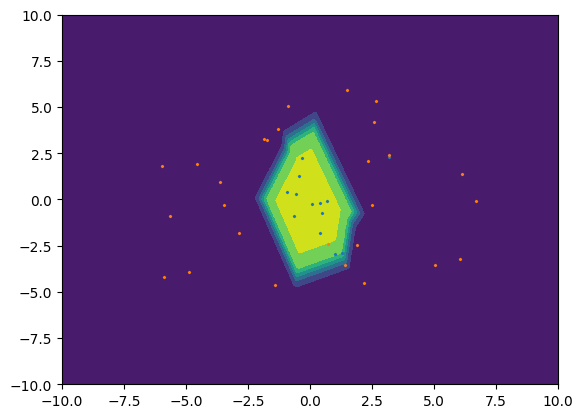

In [6]:
# Overfitting example:
X, y = gen_simple_circular_distribution(n=40,scale=2)
model.add(Dense(units=6, activation='relu', input_dim=2))
model.add(Dense(units=6, activation='relu'))
model.add(Dense(units=6, activation='relu'))
model.add(Dense(units=2, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='sgd')


y_binary = to_categorical(y)

model.fit(X, y_binary, epochs=1000, batch_size=32)

#generate the grid using a function
def gen_sample_grid(npx=200, npy=200, limit=1):
  x1line = np.linspace(-limit, limit, npx)
  x2line = np.linspace(-limit, limit, npy)
  x1grid, x2grid = np.meshgrid(x1line, x2line)
  Xgrid = np.array([x1grid, x2grid]).reshape([2,npx*npy]).T
  return Xgrid,x1line,x2line

lim = 10
Xgrid,x1line,x2line = gen_sample_grid(limit=lim)

out_values = model.predict(Xgrid)

out_grid = np.reshape(out_values[:, 0], [200, 200])

fig, ax = plt.subplots()
plt.contourf(x1line,x2line,out_grid)

ax.scatter(X[y == 0, 0], X[y == 0, 1], marker='x', s=2)
ax.scatter(X[y == 1, 0], X[y == 1, 1], marker='x', s=2)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)


In [ ]:
model.save('model.h5')

from google.colab import files
files.download('model.h5')